#Plotting Bifurcation Diagrams and Lyapunov Exponents in Python
##Math 3910 - 01: Dynamical Systems

###Seattle University, Katie Oliveras

Let's begin by importing the libraries that we will need.

In [42]:
from pylab import *
from numpy import *
%matplotlib inline

###Introduction & Defining the Map
In this notebook, we explore creating basic plots and bifurcation diagrams in python.  To begin, let's consider the logistic map defined by 

$$x_{k+1} = r x (1-x).$$

Let's define the function $f(x,r)$ which will return our iterates.  

In [43]:
def f(x,r):
  return r*x*(1-x)

### Picking the $r$ values and calculating the iterates
In order to plot the bifurcation diagram, we will need to calcuate the orbits for various $r$ values.  In this example, let's choose $100000$ $r$ values between $r = 1$ and $r = 4$.  

In [44]:
numRVals = 100000;
rVals = linspace(1,4,numRVals); # Choose numRVals points between 1 and 4 (including the endpoints)

Now, let's calculate 1000 iterations of the map defined by $f(x,r)$ given above for a random initial seed between 0 and 1.  


For each $r$ value, we want to store all of the $x$ iterates.  So, let's create a matrix $x$ where $x[j,k]$ represents the $k$-th iterate for the $j$-th $r$ value.

In [45]:
numIterations = 1000; # 1000 iterations
x = zeros((numRVals,numIterations)); # initialize a matrix of x values

for j in range(0,numRVals):
    x[j,0] = rand()
    r = rVals[j];
    for k in range(1,numIterations):
        x[j,k] = f(x[j,k-1],r)

###Plotting the Bifurcation Diagram
Now that we have calculated all of the iterates, let's plot $r$ on the horizontal axis, and the last `plotIterations` iterates of $x$ on the vertical axis.

Note: In Python, using the command 

    x[:,-10:] 

select the $x$ iterates for all of the $r$ values and the last 10 $k$ values.

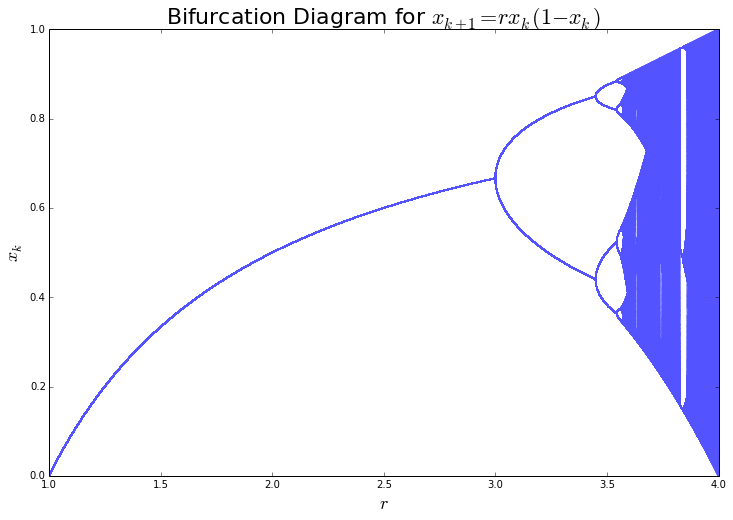

In [46]:
plotIterations = 400; 
figure(figsize=(12,8))
plot(rVals,x[:,-plotIterations:],'b.',markersize=.05);

xlabel('$r$',fontsize=18);
ylabel('$x_k$',fontsize=18);
title('Bifurcation Diagram for $x_{k+1} = r x_k (1-x_k)$',fontsize=22);
xlim(1,4);


Now, if we want to get a better picture of what's going on for $r>3.5$, we could have simply changed the $x$-limits of the graph by using the command `xlim(3.5,4)`

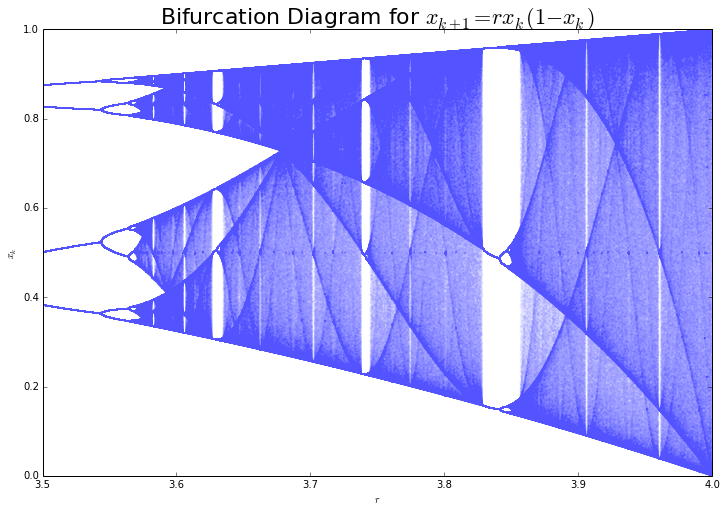

In [49]:
figure(figsize=(12,8))
plot(rVals,x[:,-plotIterations:],'b.',markersize=.05)

xlabel('$r$');
ylabel('$x_k$');
title('Bifurcation Diagram for $x_{k+1} = r x_k (1-x_k)$',fontsize=22);
xlim(3.5,4);

##Plotting the Lyapunov Exponents

In [50]:
lyapExps = zeros((numRVals,1)); # initialize a matrix of x values
for j in range(0,numRVals):
    lyapExps[j] = 0
    r = rVals[j];
    for k in range(1,numIterations):
        lyapExps[j] = lyapExps[j] + log(abs(r - 2*r*x[j,k]));

lyapExps = lyapExps/numIterations;


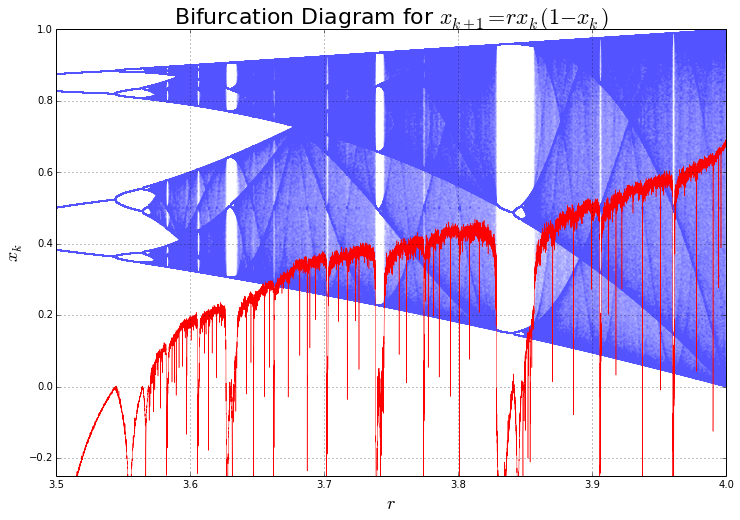

In [51]:
figure(figsize=(12,8))
plot(rVals,x[:,-plotIterations:],'b.',markersize=.05);
plot(rVals,lyapExps,'r',linewidth=.5)
xlabel('$r$',fontsize=18);
ylabel('$x_k$',fontsize=18);
title('Bifurcation Diagram for $x_{k+1} = r x_k (1-x_k)$',fontsize=22);
xlim(3.5,4);
grid()
ylim(-0.25,1);
fig = gcf()